LOAD THE DATASET

In [3]:
import pandas as pd
import os
import zipfile


path = 'archive.zip'
extract = 'desktop'
os.makedirs(extract, exist_ok=True)
with zipfile.ZipFile(path,'r') as zip_ref:
    zip_ref.extractall(extract)
print("unzipping")

unzipping


In [35]:
data = pd.read_csv("tested.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [36]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [42]:
#drop the passegerId, name, ticket, cabin
# Drop the specified columns
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)



In [43]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,34.5,0.0,0.0,7.8292,Q
1,1.0,3.0,female,47.0,1.0,0.0,7.0000,S
2,0.0,2.0,male,62.0,0.0,0.0,9.6875,Q
3,0.0,3.0,male,27.0,0.0,0.0,8.6625,S
4,1.0,3.0,female,22.0,1.0,1.0,12.2875,S
5,0.0,3.0,male,14.0,0.0,0.0,9.2250,S
6,1.0,3.0,female,30.0,0.0,0.0,7.6292,Q
7,0.0,2.0,male,26.0,1.0,1.0,29.0000,S
8,1.0,3.0,female,18.0,0.0,0.0,7.2292,C
9,0.0,3.0,male,21.0,2.0,0.0,24.1500,S


In [44]:
data.isnull().sum()/data.shape[0]*100

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [45]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

for i in data.select_dtypes(include='number').columns:
    data[i] = imputer.fit_transform(data[[i]])
    

In [46]:
data.isnull().sum()/data.shape[0]*100

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [59]:
duplicates = data.duplicated()
print("\nNumber of duplicate rows:", duplicates.sum())
print("\nDuplicate rows:")
print(data[duplicates])


Number of duplicate rows: 38

Duplicate rows:
     Survived  Pclass     Sex       Age  SibSp  Parch     Fare Embarked
79        1.0     3.0  female  24.00000    0.0    0.0   7.7500        Q
83        0.0     3.0    male  30.27259    0.0    0.0   7.8958        S
93        0.0     3.0    male  30.27259    0.0    0.0   8.0500        S
102       0.0     3.0    male  30.27259    0.0    0.0   7.7500        Q
107       0.0     3.0    male  30.27259    0.0    0.0   7.7500        Q
124       0.0     3.0    male  30.27259    0.0    0.0   7.7500        Q
148       0.0     1.0    male  30.27259    0.0    0.0  26.5500        S
158       0.0     1.0    male  42.00000    0.0    0.0  26.5500        S
180       0.0     2.0    male  30.00000    0.0    0.0  13.0000        S
183       0.0     3.0    male  30.27259    0.0    0.0   7.7500        Q
219       0.0     3.0    male  30.27259    0.0    0.0   8.0500        S
227       1.0     3.0  female  30.27259    0.0    0.0   7.7500        Q
248       1.0    

In [61]:
data.drop_duplicates(inplace=True)

In [62]:
data.duplicated().sum()

0

In [63]:
data.shape

(380, 8)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  380 non-null    float64
 1   Pclass    380 non-null    float64
 2   Sex       380 non-null    object 
 3   Age       380 non-null    float64
 4   SibSp     380 non-null    float64
 5   Parch     380 non-null    float64
 6   Fare      380 non-null    float64
 7   Embarked  380 non-null    object 
dtypes: float64(6), object(2)
memory usage: 26.7+ KB


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

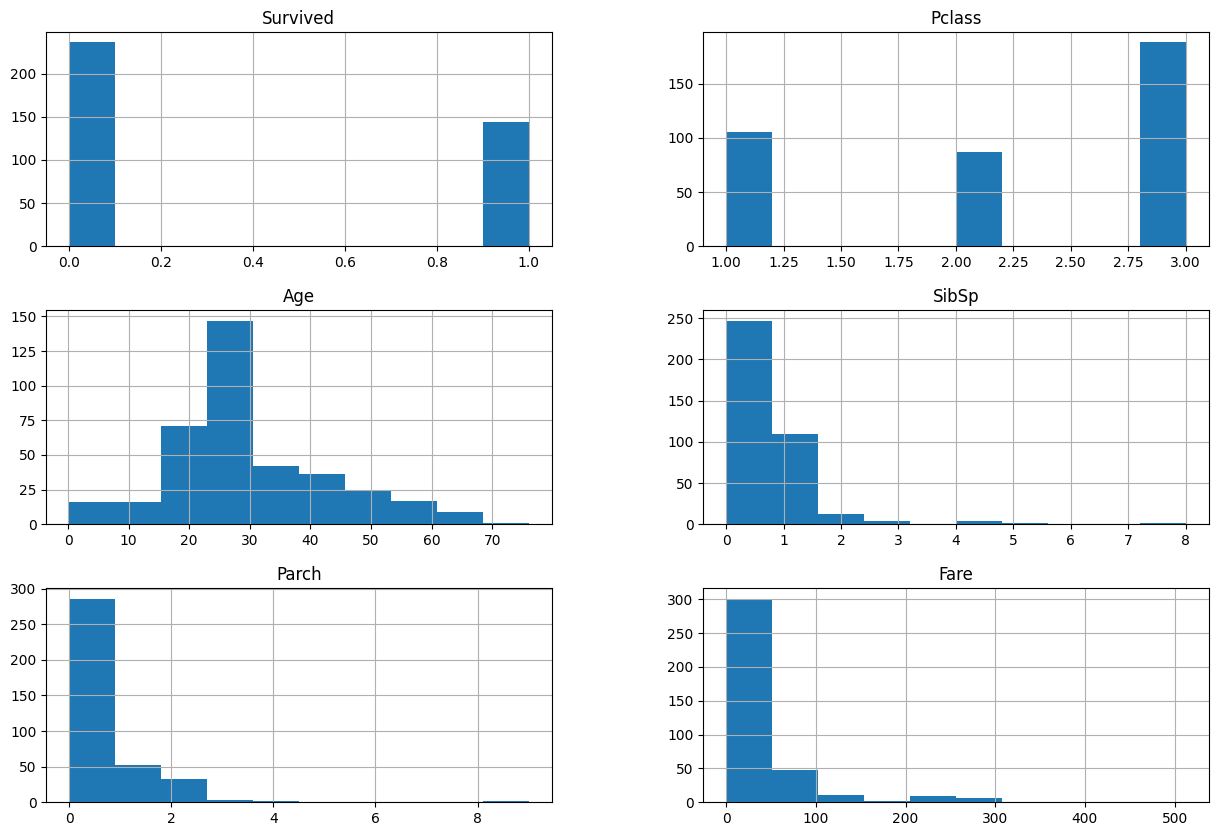

In [66]:
data.hist(figsize=(15,10))

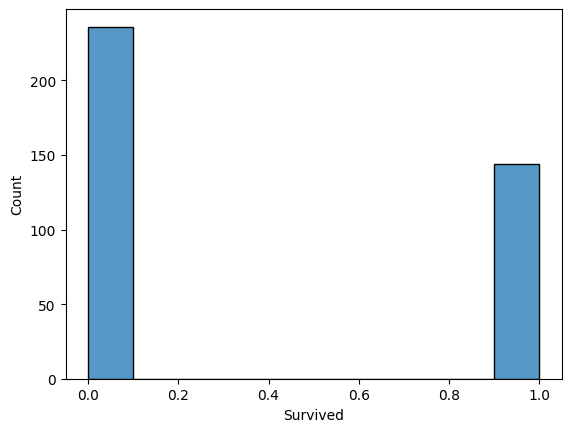

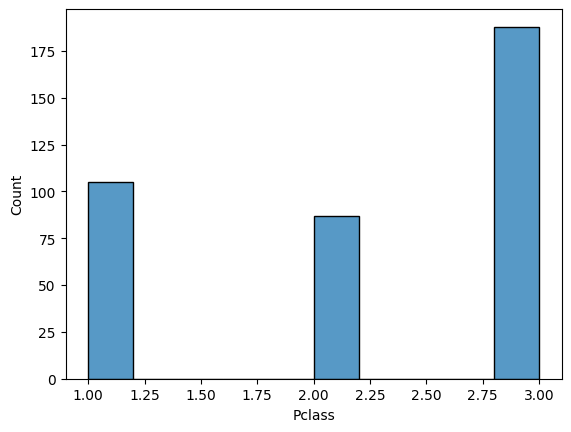

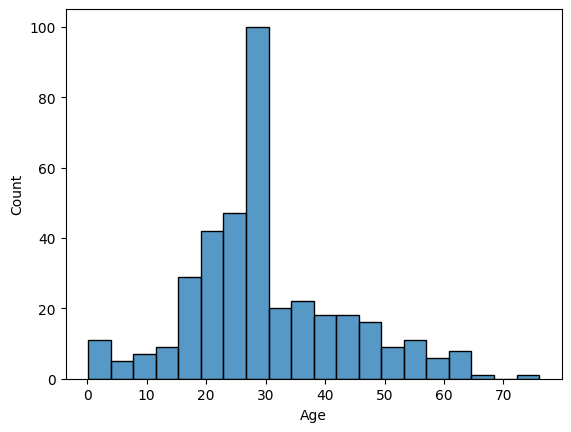

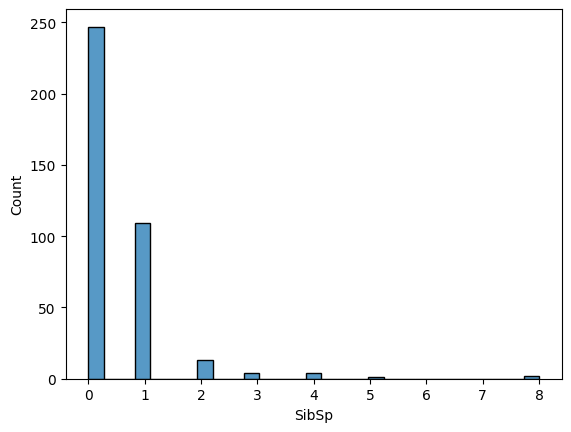

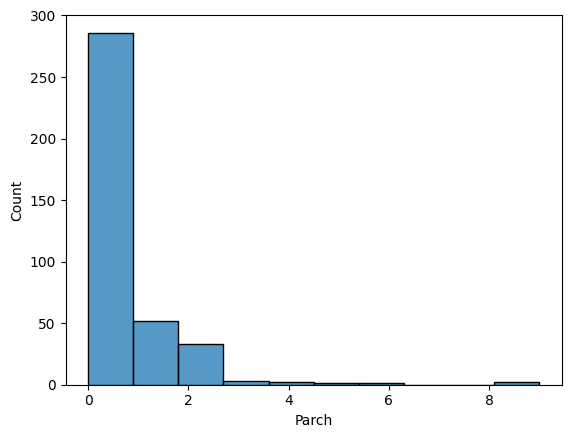

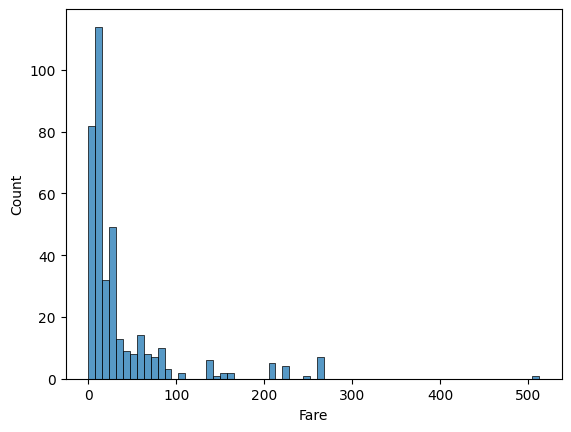

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in data.select_dtypes(include='number').columns:
    sns.histplot(data=data,x=i)
    plt.show()

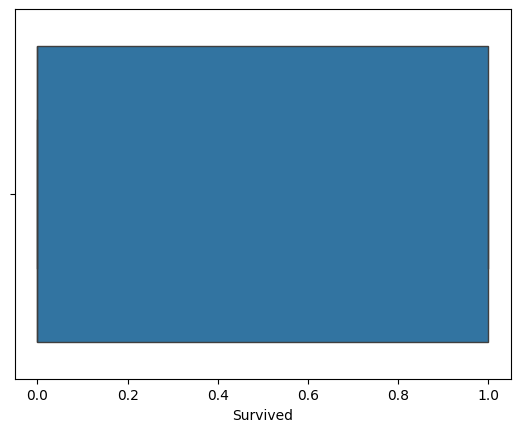

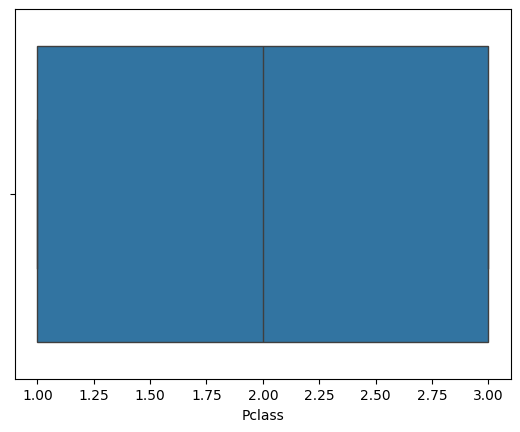

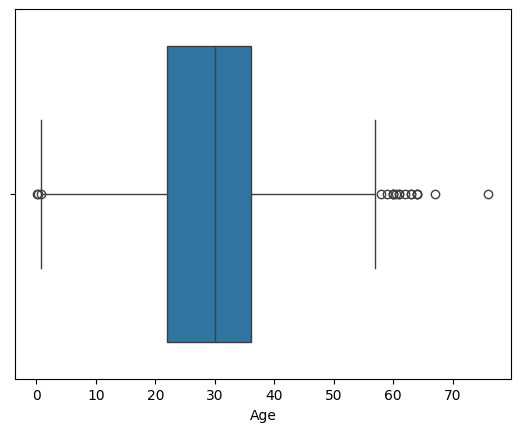

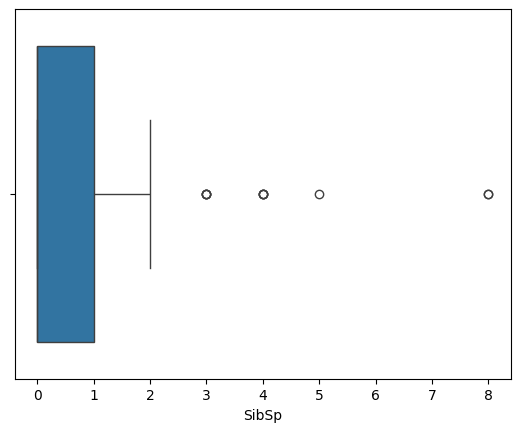

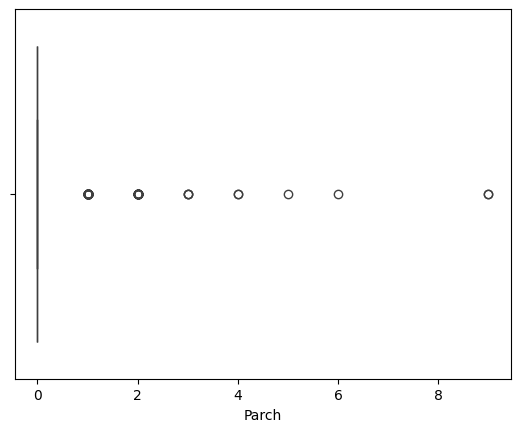

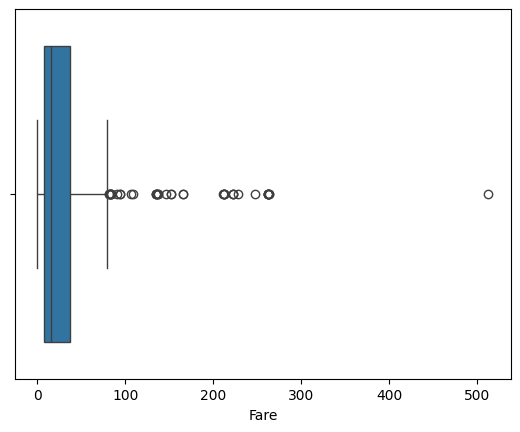

In [73]:
#checking for outliers

for i in data.select_dtypes(include='number').columns:
    sns.boxplot(data=data,x=i)
    plt.show()

In [76]:
def remove_outliers(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5*iqr
    up = q3 + 1.5*iqr
    return data[(data[col]>=lw) & (data[col]<=up)]
columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for i in columns:
    clean = remove_outliers(data,i)
new

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

# URL of the dataset
# url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
url = "tested.csv"
# Load the Titanic dataset from URL
data = pd.read_csv(url)

# Preprocessing function
def preprocess_data(data):
    data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data.drop_duplicates(inplace=True)
    new_data = pd.get_dummies(data, columns=['Sex', 'Embarked'])
    for col in ['Age', 'Fare']:
        new_data = remove_outliers(new_data, col)
    return new_data

# Outlier removal function
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filtered_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return filtered_df

# Split data into features and target
def split_data(data):
    x = data.drop('Survived', axis=1)
    y = data['Survived']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

# Standardize features
def standardize_features(x_train, x_test):
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train, x_test

# Hyperparameter tuning for Logistic Regression
def logistic_regression(x_train, x_test, y_train, y_test):
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
    grid.fit(x_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    accuracy = best_model.score(x_test, y_test)
    print("Logistic Regression Accuracy:", accuracy)
    return y_pred

# Hyperparameter tuning for Decision Tree
def decision_tree(x_train, x_test, y_train, y_test):
    param_grid = {'max_depth': [None, 10, 20, 30, 40, 50]}
    grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
    grid.fit(x_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    accuracy = best_model.score(x_test, y_test)
    print("Decision Tree Accuracy:", accuracy)
    return y_pred

# Hyperparameter tuning for Random Forest
def random_forest(x_train, x_test, y_train, y_test):
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
    grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
    grid.fit(x_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    accuracy = best_model.score(x_test, y_test)
    print("Random Forest Accuracy:", accuracy)
    return y_pred

# Hyperparameter tuning for Support Vector Machine
def support_vector_machine(x_train, x_test, y_train, y_test):
    param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
    grid = GridSearchCV(SVC(), param_grid, cv=5)
    grid.fit(x_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    accuracy = best_model.score(x_test, y_test)
    print("Support Vector Machine Accuracy:", accuracy)
    return y_pred

# Ensemble method using Voting Classifier
def voting_classifier(x_train, x_test, y_train, y_test):
    log_reg = LogisticRegression(C=1)
    dt = DecisionTreeClassifier(max_depth=10)
    rf = RandomForestClassifier(n_estimators=100, max_depth=20)
    svm = SVC(C=10, kernel='rbf', probability=True)

    ensemble_model = VotingClassifier(estimators=[
        ('lr', log_reg), 
        ('dt', dt), 
        ('rf', rf), 
        ('svm', svm)], voting='soft')
    
    ensemble_model.fit(x_train, y_train)
    y_pred = ensemble_model.predict(x_test)
    accuracy = ensemble_model.score(x_test, y_test)
    print("Voting Classifier Accuracy:", accuracy)
    return y_pred

# Preprocess data
data = preprocess_data(data)

# Split data into features and target
x_train, x_test, y_train, y_test = split_data(data)

# Standardize features
x_train, x_test = standardize_features(x_train, x_test)

# Run models
logistic_regression_pred = logistic_regression(x_train, x_test, y_train, y_test)
decision_tree_pred = decision_tree(x_train, x_test, y_train, y_test)
random_forest_pred = random_forest(x_train, x_test, y_train, y_test)
support_vector_machine_pred = support_vector_machine(x_train, x_test, y_train, y_test)
voting_classifier_pred = voting_classifier(x_train, x_test, y_train, y_test)


Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
Support Vector Machine Accuracy: 1.0
Voting Classifier Accuracy: 1.0


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

class TitanicModel:
    def __init__(self, url):
        self.data = pd.read_csv(url)
        self.x_train = None
        self.x_test = None
        self.y_train = None
        self.y_test = None

    def preprocess_data(self):
        self.data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
        self.data['Age'].fillna(self.data['Age'].median(), inplace=True)
        self.data['Embarked'].fillna(self.data['Embarked'].mode()[0], inplace=True)
        self.data.drop_duplicates(inplace=True)
        self.data = pd.get_dummies(self.data, columns=['Sex', 'Embarked'])
        for col in ['Age', 'Fare']:
            self.data = self.remove_outliers(self.data, col)
        return self.data

    @staticmethod
    def remove_outliers(df, col):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    def split_data(self):
        x = self.data.drop('Survived', axis=1)
        y = self.data['Survived']
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        return self.x_train, self.x_test, self.y_train, self.y_test

    def standardize_features(self):
        scaler = StandardScaler()
        self.x_train = scaler.fit_transform(self.x_train)
        self.x_test = scaler.transform(self.x_test)
        return self.x_train, self.x_test

    def handle_class_imbalance(self):
        smote = SMOTE(random_state=42)
        self.x_train, self.y_train = smote.fit_resample(self.x_train, self.y_train)
        return self.x_train, self.y_train

    def logistic_regression(self):
        param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
        grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
        grid.fit(self.x_train, self.y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(self.x_test)
        accuracy = best_model.score(self.x_test, self.y_test)
        print("Logistic Regression Accuracy:", accuracy)
        return y_pred

    def decision_tree(self):
        param_grid = {'max_depth': [None, 10, 20, 30, 40, 50]}
        grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
        grid.fit(self.x_train, self.y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(self.x_test)
        accuracy = best_model.score(self.x_test, self.y_test)
        print("Decision Tree Accuracy:", accuracy)
        return y_pred

    def random_forest(self):
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
        grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
        grid.fit(self.x_train, self.y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(self.x_test)
        accuracy = best_model.score(self.x_test, self.y_test)
        print("Random Forest Accuracy:", accuracy)
        return y_pred

    def support_vector_machine(self):
        param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
        grid = GridSearchCV(SVC(), param_grid, cv=5)
        grid.fit(self.x_train, self.y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(self.x_test)
        accuracy = best_model.score(self.x_test, self.y_test)
        print("Support Vector Machine Accuracy:", accuracy)
        return y_pred

    def voting_classifier(self):
        log_reg = LogisticRegression(C=1)
        dt = DecisionTreeClassifier(max_depth=10)
        rf = RandomForestClassifier(n_estimators=100, max_depth=20)
        svm = SVC(C=10, kernel='rbf', probability=True)

        ensemble_model = VotingClassifier(estimators=[
            ('lr', log_reg), 
            ('dt', dt), 
            ('rf', rf), 
            ('svm', svm)], voting='soft')

        ensemble_model.fit(self.x_train, self.y_train)
        y_pred = ensemble_model.predict(self.x_test)
        accuracy = ensemble_model.score(self.x_test, self.y_test)
        print("Voting Classifier Accuracy:", accuracy)
        return y_pred

    def cross_validate_model(self, model, name):
        scores = cross_val_score(model, self.x_train, self.y_train, cv=5)
        print(f"{name} Cross-Validation Accuracy: {scores.mean()}")

# URL of the dataset
# url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
url = "tested.csv"
# Create TitanicModel instance
model = TitanicModel(url)

# Preprocess data
model.preprocess_data()

# Split data into features and target
model.split_data()

# Standardize features
model.standardize_features()

# Handle class imbalance
model.handle_class_imbalance()

# Run models with cross-validation
model.cross_validate_model(LogisticRegression(C=1), "Logistic Regression")
logistic_regression_pred = model.logistic_regression()

model.cross_validate_model(DecisionTreeClassifier(max_depth=10), "Decision Tree")
decision_tree_pred = model.decision_tree()

model.cross_validate_model(RandomForestClassifier(n_estimators=100, max_depth=20), "Random Forest")
random_forest_pred = model.random_forest()

model.cross_validate_model(SVC(C=10, kernel='rbf'), "Support Vector Machine")
support_vector_machine_pred = model.support_vector_machine()

model.cross_validate_model(VotingClassifier(estimators=[
    ('lr', LogisticRegression(C=1)), 
    ('dt', DecisionTreeClassifier(max_depth=10)), 
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=20)), 
    ('svm', SVC(C=10, kernel='rbf', probability=True))], voting='soft'), "Voting Classifier")
voting_classifier_pred = model.voting_classifier()


Logistic Regression Cross-Validation Accuracy: 1.0
Logistic Regression Accuracy: 1.0
Decision Tree Cross-Validation Accuracy: 1.0
Decision Tree Accuracy: 1.0
Random Forest Cross-Validation Accuracy: 1.0
Random Forest Accuracy: 1.0
Support Vector Machine Cross-Validation Accuracy: 0.9969696969696968
Support Vector Machine Accuracy: 1.0
Voting Classifier Cross-Validation Accuracy: 1.0
Voting Classifier Accuracy: 1.0
